<img src="../img/viu_logo.png" width="200">

## 04EPPY - Actividad 2

25% de la Nota Final

### Fecha Entrega
- Convocatoria 1 - 31/03/2022
- Convocatoria 2 - 07/04/2022

### Instrucciones:
- Crear un notebook de Python3 que servirá como entrega de la actividad.
- Separar bien los apartados propuestos con celdas Markdown.
- Mantener una estructura limpia, comentando código y secuenciando los apartados con el código correspondiente que resuelva la actividad.
- Como criterio de evaluación se tendrá en cuenta el resultado, la consecución del mismo, estilo, comentarios y adecuación.
- No está permitido compartir los resultados ni el código en ninguno de los foros.

### Entrega:
- Un solo documento en formato notebook: .ipynb
- Para hacer la entrega hay que subir el notebook al repositorio en la actividad de blackboard.

# Olympics

### A1 - Leer Datasets - 10%
- En Kaggle existen dos datasets sobre las olimpiadas modernas
  - Atletas y resultados de medallas, desde 1896 a 2016, https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results
  - Resultados de atletismo, desde 1896 a 2016, https://www.kaggle.com/jayrav13/olympic-track-field-results
  
- Obtener y leer los ficheros csv en dataframes de pandas

In [ ]:
import pandas  as pd
import numpy as np
from  os import path
import seaborn as sns
import matplotlib.pyplot as plt

## Loaded Olympic data

In [ ]:
oly_location = path.join('res', 'olympic', 'results.csv')
oly_data = pd.read_csv(oly_location, delimiter= ',', encoding='UTF-8', error_bad_lines=False)
oly_train = pd.DataFrame(oly_data)
oly_train

In [ ]:
ath_location = path.join('res', 'athletes', 'athlete_events.csv')
data = pd.read_csv(ath_location, encoding='UTF-8')
data_test = pd.DataFrame(data)
data_test.head()
data_test.sample(15)
data.sort_values('Year').head()
data.sort_values('Year').tail()

### A2 - Análisis - 45%
- Obtener un gráfico de barras con la evolución del número de deportes por año, eje X años, eje Y número de deportes
![sports_per_year](res/sports_per_year.png)
- Gráfico con la evolución de la participación femenina en las olimpiadas a lo largo de la historia, eje X años, eje Y número de atletas, para cada año una barra para cada sexo
![sex](res/sex.png)
- Gráfico con los 50 paises con más medallas en toda la historia, en cada barra el nombre completo del pais, longitud de cada barra, total de medallas obtenidas por pais
![medallero](res/medallero.png)

In [ ]:
from matplotlib import rcParams

data = data_test['Sport'].groupby(data_test['Year']).size()
data = data.reset_index()

fig, axs = plt.subplots(figsize=(18, 10))
ax = sns.barplot(y = data['Sport'], x = data['Year'],ax=axs)
ax

In [ ]:
fig, axs = plt.subplots(figsize=(18, 3))
data_gender = data_test[data_test.Sex.isin(['M', 'F'])]

ax = sns.countplot(x='Year', hue='Sex', data=data_gender, ax=axs, palette=['red','blue'])
ax.set_xlabel('Año')
ax.set_ylabel('Número de atletas')
ax.set_title('Evolución de la participación femenina en las olimpiadas')
ax

In [ ]:
sns.barplot(x= 'Year', hue='Sex', y = 'Name', data=data_test)


In [ ]:
data_medal = data_test.groupby('Team')['Medal'].size().sort_values(ascending=False).head(50)
fig, axs = plt.subplots(figsize=(20, 10))

ax = sns.barplot(x = data_medal.values, y = data_medal.index , orient='h', ax = axs,palette='pastel')
ax.bar_label(ax.containers[0])
ax.set_xlabel('Total of medals')
ax.set_ylabel('Country')
ax.set_title('TOP 50 countries')
ax


### A3 - Machine Learning - 45%

- Crear un modelo capaz de predecir el tiempo que va a hacer un atleta en la prueba de los 100 metros lisos, en función de su edad, sexo, peso y altura.
![model](res/model.png)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

file_location = path.join('res','athletes','athlete_events.csv')
data = pd.read_csv(file_location)

In [ ]:
data.info()


In [ ]:
sns.pointplot(hue = 'Sex',y= 'Age', x = 'Medal', data = data, orient='v' )

In [ ]:
sns.pointplot(hue='Sex', y = 'Weight', x = 'Medal', data =data)

<Axes: xlabel='Medal', ylabel='Height'>

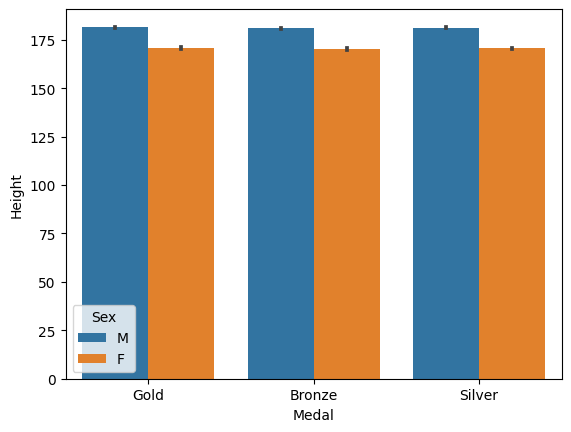

In [116]:
sns.barplot(hue='Sex', y = 'Height', x = 'Medal', data =data)


In [ ]:
data.hist(column='Age')



In [ ]:
data['Age'] = data['Age'].fillna(-0.5)
sorted(data['Age'].unique())

In [ ]:
def cat_age(data):
    '''
    Función que imputa el valor -0.5 a los NaN
    Bines: -1, 0, 12, 18, 30, 60, 120
    Input: pandas dataframe
    Output: pandas dataframe
    '''
    data['Age'] = data['Age'].fillna(-0.5)
    bins = (-1, 0, 12, 18, 30, 60, 100)
    cat_names = ['Unknown', 'Alevin', 'Juvenil', 'Senior', 'Veterano', 'Anciano']
    categorias = pd.cut(data['Age'], bins, labels=cat_names)
    data['Age'] = categorias
    return
cat_age(data=data)


In [109]:
data.sample(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
33979,17505,Roberto Calovi,M,Senior,184.0,75.0,Italy,ITA,1984 Summer,1984,Summer,Los Angeles,Cycling,"Cycling Men's Individual Pursuit, 4,000 metres",NaN
163258,81956,Jos Manuel Moreno Perin,M,Senior,180.0,79.0,Spain,ESP,1992 Summer,1992,Summer,Barcelona,Cycling,Cycling Men's Sprint,NaN
268695,134426,Zhang Bin,M,Veterano,181.0,73.0,China,CHN,2008 Summer,2008,Summer,Beijing,Equestrianism,"Equestrianism Mixed Jumping, Individual",NaN
149992,75222,Marsel Markulin,M,Senior,168.0,65.0,Yugoslavia,YUG,1960 Summer,1960,Summer,Roma,Gymnastics,Gymnastics Men's Individual All-Around,NaN
160950,80769,Shizuo Mochizuki,M,Senior,NaN,NaN,Japan,JPN,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Men's Pole Vault,NaN


[127. 128. 130. 131. 132. 133. 135. 136. 137. 138. 139. 140. 141. 142.
 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154. 155. 156.
 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168. 169. 170.
 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182. 183. 184.
 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195. 196. 197. 198.
 199. 200. 201. 202. 203. 204. 205. 206. 207. 208. 209. 210. 211. 212.
 213. 214. 215. 216. 217. 218. 219. 220. 221. 223. 226.  nan]


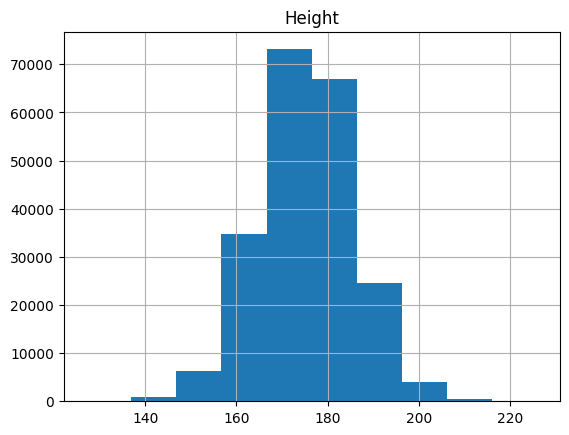

In [115]:
data_test.hist(column='Height')
pesos = data.Height.unique()
pesos.sort()
print(pesos)

In [ ]:
data_test.hist(column='Weight')

In [ ]:
data.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)
train_set
test_set
print(train_set.shape)
print(test_set.shape)